### Necessary imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [3]:
hotel = pd.read_csv("hotel_bookings.csv")

In [4]:
hotel.head() #views only first 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29264 non-null  object 
 1   is_canceled                     29264 non-null  int64  
 2   lead_time                       29264 non-null  int64  
 3   arrival_date_year               29264 non-null  int64  
 4   arrival_date_month              29264 non-null  object 
 5   arrival_date_week_number        29264 non-null  int64  
 6   arrival_date_day_of_month       29264 non-null  int64  
 7   stays_in_weekend_nights         29264 non-null  int64  
 8   stays_in_week_nights            29264 non-null  int64  
 9   adults                          29264 non-null  int64  
 10  children                        29264 non-null  int64  
 11  babies                          29264 non-null  int64  
 12  meal                            

### Data Cleaning

In [6]:
print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            1.58
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             20.65
company                           91.97


### Dropping agent and company

In [7]:
hotel = hotel.drop(['agent','company'],axis = 1) # axis = 1 for column

### Total number of confirmed bookings as per year

In [8]:
hotel['arrival_date_year'].unique() #booking years
 

array([2015, 2016, 2017])

In [10]:
confirmed_bookings = hotel[hotel.is_canceled =='0']

In [11]:
confirmed_bookings['arrival_date_year'] = hotel['arrival_date_year']

In [12]:
last = confirmed_bookings['arrival_date_year'].value_counts().sort_index()
last

2015     8314
2016    16202
2017     4748
Name: arrival_date_year, dtype: int64

### Cancelled Booking

In [13]:
hotel['is_canceled'].value_counts()

0    18152
1    11112
Name: is_canceled, dtype: int64

### Basic Observations

### 1.Customer Type

In [14]:
hotel['customer_type'].value_counts()

Transient          22533
Transient-Party     5316
Contract            1211
Group                204
Name: customer_type, dtype: int64

### There are more number of transient customers. (transient = the one's who are stayong for short period of time)

### Arrival Date month

In [15]:
hotel['arrival_date_month'].value_counts()

August       3840
July         3535
September    3108
October      3089
April        2494
May          2418
March        2276
June         2063
February     2020
December     1710
November     1491
January      1220
Name: arrival_date_month, dtype: int64

### It looks like august is the busiest month where asjanuary is the least busiest month.

### Meal

In [16]:
hotel['meal'].value_counts().unique

<bound method Series.unique of BB           21929
HB            5870
Undefined      721
FB             698
SC              46
Name: meal, dtype: int64>

It looks like HB is preferred and booked by many . (HB is Half board which means breakfast and dinner is included)

### Country

In [17]:
hotel['country'].value_counts(normalize = True)

PRT    0.498455
GBR    0.153491
ESP    0.100858
IRL    0.052529
FRA    0.032497
         ...   
CPV    0.000035
ZMB    0.000035
CYM    0.000035
SMR    0.000035
PER    0.000035
Name: country, Length: 113, dtype: float64

$0% of booking where done from portugal, 10% from Great britain and 85 from France

### 1.Market Segment

In [18]:
hotel['market_segment'].value_counts(normalize = True )

Online TA        0.434493
Offline TA/TO    0.188764
Groups           0.157805
Direct           0.151483
Corporate        0.063183
Complementary    0.004271
Name: market_segment, dtype: float64

47% people have booked through travel agents online

### !.Reservations status

In [19]:
hotel['reservation_status'].value_counts(normalize = True)

Check-Out    0.620284
Canceled     0.369908
No-Show      0.009807
Name: reservation_status, dtype: float64

63% of customers checked out and 36% customers cancelled bookings

### Visualization

first lets see cancelled bookings through different perspective

### 1. Hotel

In [22]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

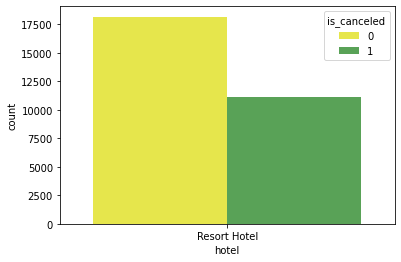

In [23]:
sns.countplot(data = hotel, x = 'hotel', hue = 'is_canceled', palette = 'Set1_r')

1. Special Request made by customers

In [24]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

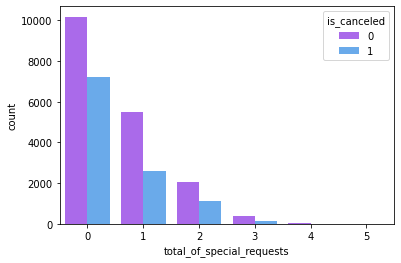

In [25]:
sns.countplot(data = hotel, x = 'total_of_special_requests', hue = 'is_canceled', palette = 'cool_r')

### 1. market_segment

In [30]:
plt.figure(figsize = (13,13))

<Figure size 936x936 with 0 Axes>

<Figure size 936x936 with 0 Axes>

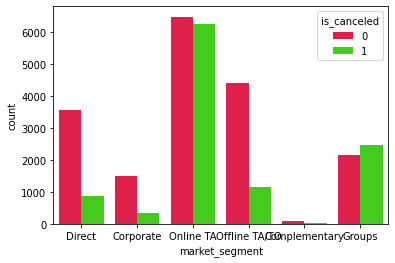

In [31]:
sns.countplot (x = "market_segment", data = hotel, hue = 'is_canceled', palette = 'prism_r')

### 1. Arrival month

it seems that july and august have high number of bookings being canceled

### 1. Deposit type

In [37]:
plt.figure(figsize= (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

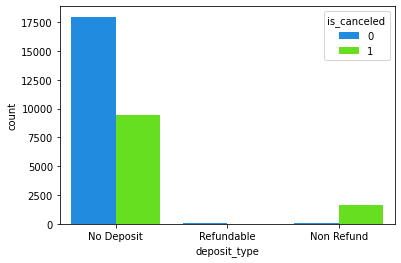

In [41]:
sns.countplot(x = 'deposit_type', data = hotel, hue = 'is_canceled',palette = 'gist_rainbow_r')

### 1. Reservations Status

In [42]:
plt.figure(figsize = (7,8))

<Figure size 504x576 with 0 Axes>

<Figure size 504x576 with 0 Axes>

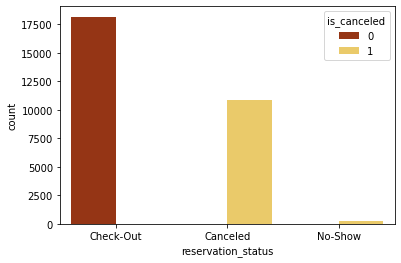

In [43]:
sns.countplot(x = 'reservation_status',data = hotel, hue = 'is_canceled',palette = 'afmhot')

In [44]:
hotel['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [51]:
plt.figure(figsize=(6,9))

<Figure size 432x648 with 0 Axes>

<Figure size 432x648 with 0 Axes>

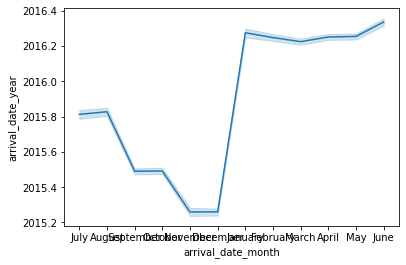

In [52]:
sns.lineplot(data = hotel, x = 'arrival_date_month', y = 'arrival_date_year')